In [1]:
import os
import sys
import tqdm
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import seed
from skopt import BayesSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error

sys.path.append('.')
sys.path.append('../../')
sys.path.append('../network_model/')
sys.path.append('../validation/')

notebook_path = os.getcwd()
project_path = os.path.abspath(os.path.join(notebook_path, '..'))
sys.path.append(project_path)

from network_model.network_classes import Network
from networks_container import NetworksContainer
from estimator import Estimator

In [2]:
cherrypicked_seed = 42

seed(cherrypicked_seed)
random.seed(cherrypicked_seed)

In [3]:
epochs = 1000

In [4]:
n_nodes = 2000
n_nodes

2000

In [5]:
n_bots = round((2 / 100) * n_nodes)
n_bots

40

In [6]:
n_fact_checkers = round((2 / 100) * n_nodes)
n_fact_checkers

40

In [7]:
n_influencers = 20

In [8]:
n_commons = n_nodes - n_bots - n_fact_checkers - n_influencers
n_commons

1900

In [9]:
n_initial_infected_nodes = round((5 / 100) * n_nodes) - n_bots
n_initial_infected_nodes

60

In [10]:
parameters_df = pd.read_csv("../validation/parameters/parameters_optimization_palin_hours_homophily_0.50.csv")

In [12]:
parameters_df = parameters_df.sort_values(by='rmse')
parameters_df

,alpha,beta,homophily,prob_infection,prob_vaccination,prob_cure,prob_influencer,prob_echo,rmse
8,0.25,0.50,0.50,0.443859,0.098546,0.127511,0.941369,0.042834,2.061167
16,0.50,0.33,0.75,0.024295,0.238505,0.627572,0.860890,0.610532,3.607667
15,0.50,0.25,0.25,0.946572,0.019471,0.806971,0.485082,0.630385,3.665503
13,0.33,0.50,0.50,0.100720,0.029019,0.626069,0.359240,0.451349,3.733030
16,0.50,0.33,0.50,0.856125,0.187407,0.125657,0.702822,0.868028,3.921738
...,...,...,...,...,...,...,...,...,...
10,0.33,0.00,0.50,0.877706,0.198097,0.047475,0.338947,0.740148,32.870191
0,0.00,0.00,0.50,0.347875,0.328040,0.842198,0.947431,0.422984,33.392833
5,0.25,0.00,0.50,0.861757,0.366898,0.452570,0.447949,0.823765,33.414271
0,0.00,0.00,0.25,0.347875,0.328040,0.842198,0.947431,0.422984,33.445233


In [13]:
alpha = parameters_df['alpha'].iloc[0]
beta = parameters_df['beta'].iloc[0]
homophily = parameters_df['homophily'].iloc[0]
prob_infection = parameters_df['prob_infection'].iloc[0]
prob_vaccination = parameters_df['prob_vaccination'].iloc[0]
prob_cure = parameters_df['prob_cure'].iloc[0]
prob_influencer = parameters_df['prob_influencer'].iloc[0]
prob_echo = parameters_df['prob_echo'].iloc[0]

In [14]:
prob_complaint = 0.0

In [15]:
container = NetworksContainer(n_networks=30, n_nodes=n_nodes, 
                              alpha=alpha, beta=beta, 
                              delta_in=1, delta_out=1, 
                              homophily=homophily, n_commons=n_commons, 
                              n_influencers=n_influencers, n_bots=n_bots, 
                              n_fact_checkers=n_fact_checkers,
                              prob_complaint=prob_complaint, 
                              prob_infection=prob_infection, 
                              prob_vaccination=prob_vaccination,
                              prob_cure=prob_cure, 
                              prob_influencer=prob_influencer, 
                              exp_decay=True, user_block=True, 
                              prob_echo=prob_echo, epochs=epochs)
container.create_network_list(n_initial_infected_nodes=n_initial_infected_nodes)

In [16]:
total_y_pred_list_prob_000 = []
total_blocked_nodes_prob_000 = []

for i in range(container.n_networks):   
    y_pred_list = []
    container.network_list[i].reset_network()
    for j in range(container.epochs):
        container.network_list[i].update_nodes()
    y_pred_list = container.network_list[i].perc_infected
    total_y_pred_list_prob_000.append(y_pred_list)
    total_blocked_nodes_prob_000.append(container.network_list[i].n_blocked_nodes)

In [17]:
prob_complaint = 0.25
container.set_prob_complaint(prob_complaint)

In [18]:
total_y_pred_list_prob_025 = []
total_blocked_nodes_prob_025 = []

for i in range(container.n_networks):   
    y_pred_list = []
    container.network_list[i].reset_network()
    for j in range(container.epochs):
        container.network_list[i].update_nodes()
    y_pred_list = container.network_list[i].perc_infected
    total_y_pred_list_prob_025.append(y_pred_list)
    total_blocked_nodes_prob_025.append(container.network_list[i].n_blocked_nodes)

In [19]:
prob_complaint = 0.50
container.set_prob_complaint(prob_complaint)

In [20]:
total_y_pred_list_prob_050 = []
total_blocked_nodes_prob_050 = []

for i in range(container.n_networks):   
    y_pred_list = []
    container.network_list[i].reset_network()
    for j in range(container.epochs):
        container.network_list[i].update_nodes()
    y_pred_list = container.network_list[i].perc_infected
    total_y_pred_list_prob_050.append(y_pred_list)
    total_blocked_nodes_prob_050.append(container.network_list[i].n_blocked_nodes)

In [21]:
prob_complaint = 0.75
container.set_prob_complaint(prob_complaint)

In [22]:
total_y_pred_list_prob_075 = []
total_blocked_nodes_prob_075 = []

for i in range(container.n_networks):   
    y_pred_list = []
    container.network_list[i].reset_network()
    for j in range(container.epochs):
        container.network_list[i].update_nodes()
    y_pred_list = container.network_list[i].perc_infected
    total_y_pred_list_prob_075.append(y_pred_list)
    total_blocked_nodes_prob_075.append(container.network_list[i].n_blocked_nodes)

In [23]:
prob_complaint = 1.00
container.set_prob_complaint(prob_complaint)

In [24]:
total_y_pred_list_prob_100 = []
total_blocked_nodes_prob_100 = []

for i in range(container.n_networks):   
    y_pred_list = []
    container.network_list[i].reset_network()
    for j in range(container.epochs):
        container.network_list[i].update_nodes()
    y_pred_list = container.network_list[i].perc_infected
    total_y_pred_list_prob_100.append(y_pred_list)
    total_blocked_nodes_prob_100.append(container.network_list[i].n_blocked_nodes)

In [25]:
avg_y_pred_list_prob_000 = [sum(column) / len(column) for column in zip(*total_y_pred_list_prob_000)]
avg_y_pred_list_prob_025 = [sum(column) / len(column) for column in zip(*total_y_pred_list_prob_025)]
avg_y_pred_list_prob_050 = [sum(column) / len(column) for column in zip(*total_y_pred_list_prob_050)]
avg_y_pred_list_prob_075 = [sum(column) / len(column) for column in zip(*total_y_pred_list_prob_075)]
avg_y_pred_list_prob_100 = [sum(column) / len(column) for column in zip(*total_y_pred_list_prob_100)]

In [26]:
std_y_pred_list_prob_000 = [np.std(column) for column in zip(*total_y_pred_list_prob_000)]
std_y_pred_list_prob_025 = [np.std(column) for column in zip(*total_y_pred_list_prob_025)]
std_y_pred_list_prob_050 = [np.std(column) for column in zip(*total_y_pred_list_prob_050)]
std_y_pred_list_prob_075 = [np.std(column) for column in zip(*total_y_pred_list_prob_075)]
std_y_pred_list_prob_100 = [np.std(column) for column in zip(*total_y_pred_list_prob_100)]

In [27]:
std_low_y_pred_list_prob_000 = []
std_high_y_pred_list_prob_000 = []
std_low_y_pred_list_prob_025 = []
std_high_y_pred_list_prob_025 = []
std_low_y_pred_list_prob_050 = []
std_high_y_pred_list_prob_050 = []
std_low_y_pred_list_prob_075 = []
std_high_y_pred_list_prob_075 = []
std_low_y_pred_list_prob_100 = []
std_high_y_pred_list_prob_100 = []

for i in range(len(avg_y_pred_list_prob_000)):
    std_low_y_pred_list_prob_000.append(avg_y_pred_list_prob_000[i] - std_y_pred_list_prob_000[i])
    std_high_y_pred_list_prob_000.append(avg_y_pred_list_prob_000[i] + std_y_pred_list_prob_000[i])

for i in range(len(avg_y_pred_list_prob_025)):
    std_low_y_pred_list_prob_025.append(avg_y_pred_list_prob_025[i] - std_y_pred_list_prob_025[i])
    std_high_y_pred_list_prob_025.append(avg_y_pred_list_prob_025[i] + std_y_pred_list_prob_025[i])

for i in range(len(avg_y_pred_list_prob_050)):
    std_low_y_pred_list_prob_050.append(avg_y_pred_list_prob_050[i] - std_y_pred_list_prob_050[i])
    std_high_y_pred_list_prob_050.append(avg_y_pred_list_prob_050[i] + std_y_pred_list_prob_050[i])

for i in range(len(avg_y_pred_list_prob_075)):
    std_low_y_pred_list_prob_075.append(avg_y_pred_list_prob_075[i] - std_y_pred_list_prob_075[i])
    std_high_y_pred_list_prob_075.append(avg_y_pred_list_prob_075[i] + std_y_pred_list_prob_075[i])

for i in range(len(avg_y_pred_list_prob_100)):
    std_low_y_pred_list_prob_100.append(avg_y_pred_list_prob_100[i] - std_y_pred_list_prob_100[i])
    std_high_y_pred_list_prob_100.append(avg_y_pred_list_prob_100[i] + std_y_pred_list_prob_100[i])

In [28]:
x = []
for i in range(epochs + 1):
    x.append(i)

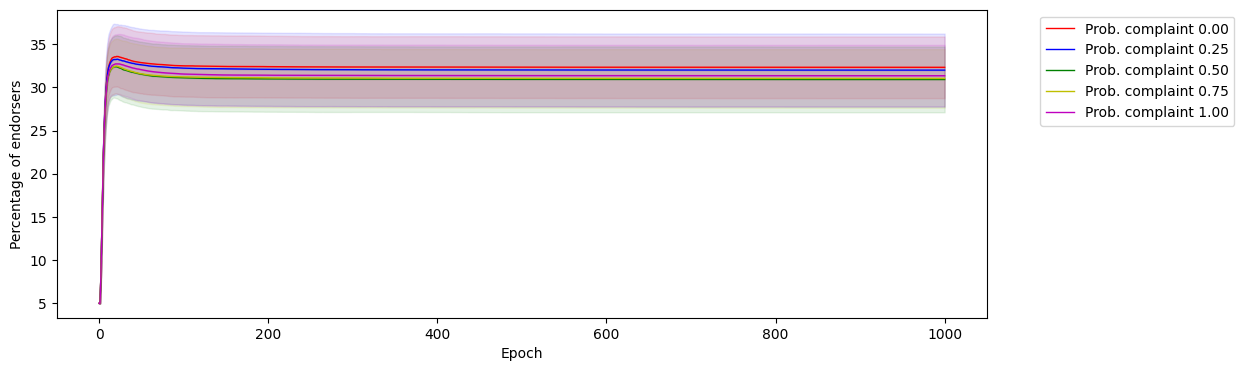

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(avg_y_pred_list_prob_000, c='r', label='Prob. complaint 0.00', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_prob_000, std_low_y_pred_list_prob_000, color='r', alpha=.1)
axs.fill_between(x, avg_y_pred_list_prob_000, std_high_y_pred_list_prob_000, color='r', alpha=.1)
plt.plot(avg_y_pred_list_prob_025, c='b', label='Prob. complaint 0.25', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_prob_025, std_low_y_pred_list_prob_025, color='b', alpha=.1)
axs.fill_between(x, avg_y_pred_list_prob_025, std_high_y_pred_list_prob_025, color='b', alpha=.1)
plt.plot(avg_y_pred_list_prob_050, c='g', label='Prob. complaint 0.50', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_prob_050, std_low_y_pred_list_prob_050, color='g', alpha=.1)
axs.fill_between(x, avg_y_pred_list_prob_050, std_high_y_pred_list_prob_050, color='g', alpha=.1)
plt.plot(avg_y_pred_list_prob_075, c='y', label='Prob. complaint 0.75', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_prob_075, std_low_y_pred_list_prob_075, color='y', alpha=.1)
axs.fill_between(x, avg_y_pred_list_prob_075, std_high_y_pred_list_prob_075, color='y', alpha=.1)
plt.plot(avg_y_pred_list_prob_100, c='m', label='Prob. complaint 1.00', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_prob_100, std_low_y_pred_list_prob_100, color='m', alpha=.1)
axs.fill_between(x, avg_y_pred_list_prob_100, std_high_y_pred_list_prob_100, color='m', alpha=.1)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Epoch")
plt.ylabel("Percentage of endorsers")
plt.show()

In [30]:
x = []
avg_y_pred_list_prob_000_truncated = []
std_low_y_pred_list_prob_000_truncated = []
std_high_y_pred_list_prob_000_truncated = []
avg_y_pred_list_prob_025_truncated = []
std_low_y_pred_list_prob_025_truncated = []
std_high_y_pred_list_prob_025_truncated = []
avg_y_pred_list_prob_050_truncated = []
std_low_y_pred_list_prob_050_truncated = []
std_high_y_pred_list_prob_050_truncated = []
avg_y_pred_list_prob_075_truncated = []
std_low_y_pred_list_prob_075_truncated = []
std_high_y_pred_list_prob_075_truncated = []
avg_y_pred_list_prob_100_truncated = []
std_low_y_pred_list_prob_100_truncated = []
std_high_y_pred_list_prob_100_truncated = []
for i in range(500):
    x.append(i)
    avg_y_pred_list_prob_000_truncated.append(avg_y_pred_list_prob_000[i])
    std_low_y_pred_list_prob_000_truncated.append(std_low_y_pred_list_prob_000[i])
    std_high_y_pred_list_prob_000_truncated.append(std_high_y_pred_list_prob_000[i])
    avg_y_pred_list_prob_025_truncated.append(avg_y_pred_list_prob_025[i])
    std_low_y_pred_list_prob_025_truncated.append(std_low_y_pred_list_prob_025[i])
    std_high_y_pred_list_prob_025_truncated.append(std_high_y_pred_list_prob_025[i])
    avg_y_pred_list_prob_050_truncated.append(avg_y_pred_list_prob_050[i])
    std_low_y_pred_list_prob_050_truncated.append(std_low_y_pred_list_prob_050[i])
    std_high_y_pred_list_prob_050_truncated.append(std_high_y_pred_list_prob_050[i])
    avg_y_pred_list_prob_075_truncated.append(avg_y_pred_list_prob_075[i])
    std_low_y_pred_list_prob_075_truncated.append(std_low_y_pred_list_prob_075[i])
    std_high_y_pred_list_prob_075_truncated.append(std_high_y_pred_list_prob_075[i])
    avg_y_pred_list_prob_100_truncated.append(avg_y_pred_list_prob_100[i])
    std_low_y_pred_list_prob_100_truncated.append(std_low_y_pred_list_prob_100[i])
    std_high_y_pred_list_prob_100_truncated.append(std_high_y_pred_list_prob_100[i])

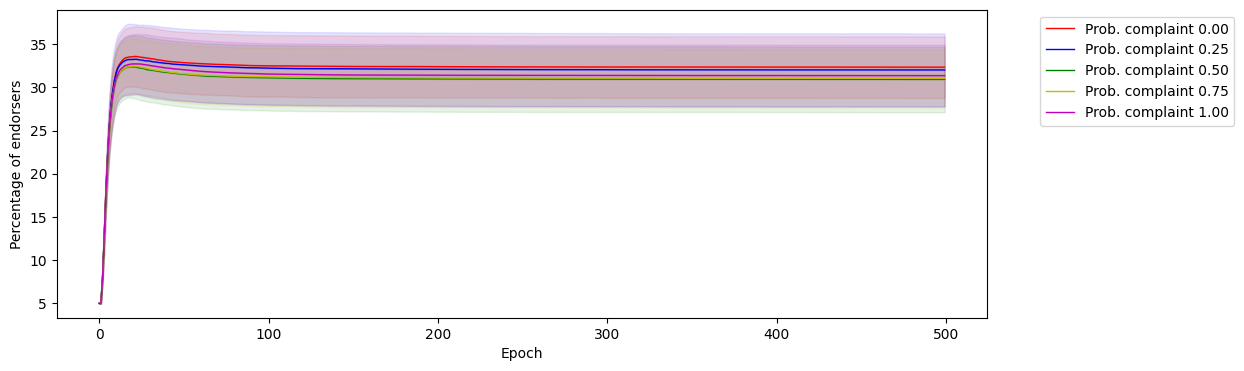

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(avg_y_pred_list_prob_000_truncated, c='r', label='Prob. complaint 0.00', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_prob_000_truncated, std_low_y_pred_list_prob_000_truncated, color='r', alpha=.1)
axs.fill_between(x, avg_y_pred_list_prob_000_truncated, std_high_y_pred_list_prob_000_truncated, color='r', alpha=.1)
plt.plot(avg_y_pred_list_prob_025_truncated, c='b', label='Prob. complaint 0.25', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_prob_025_truncated, std_low_y_pred_list_prob_025_truncated, color='b', alpha=.1)
axs.fill_between(x, avg_y_pred_list_prob_025_truncated, std_high_y_pred_list_prob_025_truncated, color='b', alpha=.1)
plt.plot(avg_y_pred_list_prob_050_truncated, c='g', label='Prob. complaint 0.50', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_prob_050_truncated, std_low_y_pred_list_prob_050_truncated, color='g', alpha=.1)
axs.fill_between(x, avg_y_pred_list_prob_050_truncated, std_high_y_pred_list_prob_050_truncated, color='g', alpha=.1)
plt.plot(avg_y_pred_list_prob_075_truncated, c='y', label='Prob. complaint 0.75', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_prob_075_truncated, std_low_y_pred_list_prob_075_truncated, color='y', alpha=.1)
axs.fill_between(x, avg_y_pred_list_prob_075_truncated, std_high_y_pred_list_prob_075_truncated, color='y', alpha=.1)
plt.plot(avg_y_pred_list_prob_100_truncated, c='m', label='Prob. complaint 1.00', linewidth=1.0)
axs.fill_between(x, avg_y_pred_list_prob_100_truncated, std_low_y_pred_list_prob_100_truncated, color='m', alpha=.1)
axs.fill_between(x, avg_y_pred_list_prob_100_truncated, std_high_y_pred_list_prob_100_truncated, color='m', alpha=.1)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Epoch")
plt.ylabel("Percentage of endorsers")
plt.show()

In [32]:
df_total_y_pred_list_000 = pd.DataFrame(total_y_pred_list_prob_000).T
df_total_y_pred_list_000.to_csv("simulation_complaint_0.00_obama_endorsers_percentages.csv", index=False, header=False)

df_total_y_pred_list_025 = pd.DataFrame(total_y_pred_list_prob_025).T
df_total_y_pred_list_025.to_csv("simulation_complaint_0.25_obama_endorsers_percentages.csv", index=False, header=False)

df_total_y_pred_list_050 = pd.DataFrame(total_y_pred_list_prob_050).T
df_total_y_pred_list_050.to_csv("simulation_complaint_0.50_obama_endorsers_percentages.csv", index=False, header=False)

df_total_y_pred_list_075 = pd.DataFrame(total_y_pred_list_prob_075).T
df_total_y_pred_list_075.to_csv("simulation_complaint_0.75_obama_endorsers_percentages.csv", index=False, header=False)

df_total_y_pred_list_100 = pd.DataFrame(total_y_pred_list_prob_100).T
df_total_y_pred_list_100.to_csv("simulation_complaint_1.00_obama_endorsers_percentages.csv", index=False, header=False)

In [33]:
df_statistics = pd.DataFrame(avg_y_pred_list_prob_000).T
df_statistics.loc[1] = std_y_pred_list_prob_000
df_statistics.loc[2] = std_high_y_pred_list_prob_000
df_statistics.loc[3] = std_low_y_pred_list_prob_000
df_statistics.loc[4] = avg_y_pred_list_prob_025
df_statistics.loc[5] = std_y_pred_list_prob_025
df_statistics.loc[6] = std_high_y_pred_list_prob_025
df_statistics.loc[7] = std_low_y_pred_list_prob_025
df_statistics.loc[8] = avg_y_pred_list_prob_050
df_statistics.loc[9] = std_y_pred_list_prob_050
df_statistics.loc[10] = std_high_y_pred_list_prob_050
df_statistics.loc[11] = std_low_y_pred_list_prob_050
df_statistics.loc[12] = avg_y_pred_list_prob_075
df_statistics.loc[13] = std_y_pred_list_prob_075
df_statistics.loc[14] = std_high_y_pred_list_prob_075
df_statistics.loc[15] = std_low_y_pred_list_prob_075
df_statistics.loc[16] = avg_y_pred_list_prob_100
df_statistics.loc[17] = std_y_pred_list_prob_100
df_statistics.loc[18] = std_high_y_pred_list_prob_100
df_statistics.loc[19] = std_low_y_pred_list_prob_100
df_statistics.to_csv("simulation_complaint_obama_statistics.csv", index=False, header=False)

In [34]:
mean_blocked_nodes_prob_000 = np.mean(total_blocked_nodes_prob_000)
std_blocked_nodes_prob_000 = np.std(total_blocked_nodes_prob_000)
print("Mean blocked nodes prob. 0.00: ", mean_blocked_nodes_prob_000)
print("Standard deviation blocked nodes prob. 0.00: ", std_blocked_nodes_prob_000)

Mean blocked nodes prob. 0.00:  0.0
Standard deviation blocked nodes prob. 0.00:  0.0


In [35]:
mean_blocked_nodes_prob_025 = np.mean(total_blocked_nodes_prob_025)
std_blocked_nodes_prob_025 = np.std(total_blocked_nodes_prob_025)
print("Mean blocked nodes prob. 0.25: ", mean_blocked_nodes_prob_025)
print("Standard deviation blocked nodes prob. 0.25: ", std_blocked_nodes_prob_025)

Mean blocked nodes prob. 0.25:  8.966666666666667
Standard deviation blocked nodes prob. 0.25:  5.467987645275809


In [36]:
mean_blocked_nodes_prob_050 = np.mean(total_blocked_nodes_prob_050)
std_blocked_nodes_prob_050 = np.std(total_blocked_nodes_prob_050)
print("Mean blocked nodes prob. 0.50: ", mean_blocked_nodes_prob_050)
print("Standard deviation blocked nodes prob. 0.50: ", std_blocked_nodes_prob_050)

Mean blocked nodes prob. 0.50:  11.733333333333333
Standard deviation blocked nodes prob. 0.50:  6.2339571880325115


In [37]:
mean_blocked_nodes_prob_075 = np.mean(total_blocked_nodes_prob_075)
std_blocked_nodes_prob_075 = np.std(total_blocked_nodes_prob_075)
print("Mean blocked nodes prob. 0.75: ", mean_blocked_nodes_prob_075)
print("Standard deviation blocked nodes prob. 0.75: ", std_blocked_nodes_prob_075)

Mean blocked nodes prob. 0.75:  11.333333333333334
Standard deviation blocked nodes prob. 0.75:  6.12281707132337


In [38]:
mean_blocked_nodes_prob_100 = np.mean(total_blocked_nodes_prob_100)
std_blocked_nodes_prob_100 = np.std(total_blocked_nodes_prob_100)
print("Mean blocked nodes prob. 1.00: ", mean_blocked_nodes_prob_100)
print("Standard deviation blocked nodes prob. 1.00: ", std_blocked_nodes_prob_100)

Mean blocked nodes prob. 1.00:  11.566666666666666
Standard deviation blocked nodes prob. 1.00:  7.031753377042994


In [39]:
df_blocked = pd.DataFrame(total_blocked_nodes_prob_000).T
df_blocked.loc[1] = mean_blocked_nodes_prob_000
df_blocked.loc[2] = std_blocked_nodes_prob_000
df_blocked.loc[3] = total_blocked_nodes_prob_025
df_blocked.loc[4] = mean_blocked_nodes_prob_025
df_blocked.loc[5] = std_blocked_nodes_prob_025
df_blocked.loc[6] = total_blocked_nodes_prob_050
df_blocked.loc[7] = mean_blocked_nodes_prob_050
df_blocked.loc[8] = std_blocked_nodes_prob_050
df_blocked.loc[9] = total_blocked_nodes_prob_075
df_blocked.loc[10] = mean_blocked_nodes_prob_075
df_blocked.loc[11] = std_blocked_nodes_prob_075
df_blocked.loc[12] = total_blocked_nodes_prob_100
df_blocked.loc[13] = mean_blocked_nodes_prob_100
df_blocked.loc[14] = std_blocked_nodes_prob_100
df_statistics.to_csv("simulation_blocked_obama_statistics.csv", index=False, header=False)